In [19]:
import warnings
warnings.filterwarnings('ignore')
# read csv file:
handle=open('./SecilSH_turkce-veriseti-master/turkce_veriseti.csv',encoding="utf-8")
# handle=open('./SecilSH_turkce-veriseti-master/turkce_veriseti.csv')
# Kayıt deseni: "Ana Kategori", Alt Kategori, Website Adresi,  DMOZ Başlığı, DMOZ Açıklaması, Website Başlığı, Website Meta Açıklaması, Website Meta Kelimeleri, "Website İçeriği"

In [20]:
categories_data= {} #dictionary
for line in handle:
    my_list= line.split(',')
    main_category= my_list[0]
    main_category= main_category[1:-1]
    content= my_list[-1]
    content= content[1:-1]
   
    if main_category not in categories_data.keys():
        categories_data[main_category]= []
    categories_data[main_category].append(content)
print(my_list[0])
print("done")


"Çocuklar_ve_Gençler"
done


In [3]:
import os.path
for cat in categories_data.keys():
    # create a new file:
    file_name= "./data/"+ cat+".txt" # indicates after the current folder: ./
    with open(file_name,"w",encoding="utf8") as f: # +: create if not exists
    # with open(file_name,"w") as f: # +: create if not exists
        for item in categories_data[cat]:
                item = item.replace(' "','')
                f.write(item+'\n')
    f.close()
           # print(item)

In [4]:
# Corpus reader:
import os
root = './data/'
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
reader = CategorizedPlaintextCorpusReader(root, r'.*\.txt', cat_pattern=r'(\w+)/*', encoding='utf-8')
#reader = CategorizedPlaintextCorpusReader(root, r'.*\.txt', cat_pattern=r'(\w+)/*')

In [22]:
print(reader.categories())
print(reader.fileids())


['Alışveriş.txt', 'Basın_ve_Yayın.txt', 'Bilgisayar.txt', 'Bilim.txt', 'Ekonomi_ve_İş_Dünyası.txt', 'Ev.txt', 'Eğlence_ve_Yaşam.txt', 'Kaynaklar.txt', 'Kültür_ve_Sanat.txt', 'Oyunlar.txt', 'Sağlık.txt', 'Spor.txt', 'Toplum.txt', 'Çocuklar_ve_Gençler.txt']


In [6]:
def sent_tokenize_whole_tweets(text): # raw text --> whole tweets file content
    sents = text.split('\n')
    for s in sents:
        s= s.strip() # removes whitespaces in both end
    return sents

In [7]:
all_text=[]
labels= []
count=0
for label,file_name in zip(reader.categories(), reader.fileids()):
    sentences= sent_tokenize_whole_tweets(reader.raw(file_name)) # --> this should return a list of contents
    labels.extend([label for i in sentences[:-1]]) # son satırı sil
    #labels.remove(labels[-1])
    all_text.extend([i for i in sentences[:-1]]) # son satırı sil
    #all_text.remove(all_text[-1])
    #print('Dosya adı:'+file_name+'DENEMEE')
#print(len(sentences))
print(len(labels))
print(len(all_text))
# Now, we have all tweets in all_text list!

22347
22347


In [40]:
labels[5000]

'Ekonomi_ve_İş_Dünyası'

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, use_idf=True) ## en az 2 dokumanda gorulmelıç

%time tfidf_matrix = tfidf_vectorizer.fit_transform(all_text) #fit the vectorizer to all_text

print(tfidf_matrix.shape)

Wall time: 7.74 s
(22347, 100)


In [9]:
type(tfidf_matrix)

scipy.sparse.csr.csr_matrix

In [10]:
X_trial= tfidf_matrix.toarray()

In [11]:
type(X_trial)

numpy.ndarray

In [12]:
X_trial.shape

(22347, 100)

In [13]:
import numpy as np
y_trial= np.array(labels)

In [14]:
type(y_trial)

numpy.ndarray

In [15]:
print(tfidf_matrix.getcol(0).size)
type(tfidf_matrix)

4928


scipy.sparse.csr.csr_matrix

Using seed 1132743
bad medoids:
[7364, 565, 16881, 10617, 10941, 19304, 19922]
old mcurr:
[ 1528 14125 16392 19316  9135   693  6820   565 16881 10617 10941 19304
  7364 19922]
new mcurr:
[  693  1528  6820  7350  9019  9135 10226 12234 13795 14125 16126 16392
 16927 19316]
finished iter: 1
finished iter: 2
finished iterative phase...
Accuracy: 0.3346
cluster counts:
[-1.0000e+00  6.9300e+02  1.5280e+03  6.8200e+03  7.3500e+03  9.0190e+03
  9.1350e+03  1.0226e+04  1.2234e+04  1.3795e+04  1.4125e+04  1.6126e+04
  1.6392e+04  1.6927e+04  1.9316e+04]
[208, 14533, 4096, 1666, 566, 381, 279, 324, 51, 101, 33, 55, 37, 3, 14]


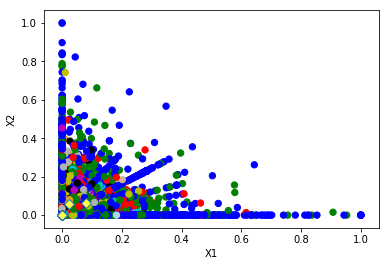

In [18]:
%run proclus.ipynb
%run plotter.ipynb
%run arffreader.ipynb
#import numpy as np
#import adjrand

X = X_trial
sup= y_trial

Dims = [1,2]
# plotter.plotDataset(X, D = Dims)

R = 1 # toggle run proclus
RS = 0 # toggle use random seed

if R: # run proclus
	rseed = 1132743
	if RS:
		rseed = np.random.randint(low = 0, high = 1239831)

	print("Using seed %d" % rseed)

	M, D, A = proclus(X, k = 14, l = 2, seed = rseed)
	print("Accuracy: %.4f" % computeBasicAccuracy(A, sup))
	#print("Adjusted rand index: %.4f" % adjrand.computeAdjustedRandIndex(A, sup))
	
	plotClustering(X_trial, M, A, D = Dims)

In [108]:
keys=range(22347)
values=y_trial #labels
ground_truth = dict(zip(keys, values))

In [116]:
keys_cluster= range(22347)
values_cluster= A # A is known as assigned clusters and comes from proclus output. 
clustering = dict(zip(keys, values))

In [110]:
print(A)

[6820.  693. 9135. ... 6820.  693. 1528.]


In [111]:
"""Examples for computing extended BCubed.
   cdict: dictionary representing a particular clustering output
   ldict: dictionary representing the ground-truth or gold-standard data
   Format for both dictionaries: {item: set of assigned clusters/real categories}
   The values are sets to support overlapping clustering and ground-truth categories.
"""

import bcubed

def compute(title, cdict, ldict):
    """Compute extended BCubed precision and recall, and print the results."""
    precision = bcubed.precision(cdict, ldict)
    recall = bcubed.recall(cdict, ldict)
    fscore = bcubed.fscore(precision, recall)
    print("{}: precision={:.2f}, recall={:.2f}, fscore={:.2f}".format(
        title, precision, recall, fscore))

compute("Cluster Evaluation", clustering, ground_truth)



TypeError: unsupported operand type(s) for &: 'numpy.str_' and 'numpy.str_'